# Visualize dataset

this notebook animates visual stimulus movie along with calcium recordings

In [1]:
import torch
import torch.nn.functional as F
import numpy as np

import pickle
import json
import time
import os
import argparse

import sys
sys.path.append('..')

from stcnn.ca_dataloader import LCDataLoader, load_ca_data, load_vstim_mov
from stcnn.util_analysis import get_data_by_vstim, animate_vstim_ca, animate_grid_vstim_ca

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera

In [2]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name())
    dev_cnt = torch.cuda.device_count()
    print(f'CUDA version {torch.version.cuda}')
    my_device = torch.device('cuda:' + str(dev_cnt-1) )  
else:
    my_device = torch.device('cpu')

print(my_device)

Quadro RTX 5000
CUDA version 10.2
cuda:1


## Define file paths for calcium and stimulus movie data


In [3]:
cwd_path = Path.cwd()

ca_path = '/groups/card/cardlab/klapoetken/optic_glomeruli/data/split_dataset/ca_traces_lc4_rfonly/'
mov_path = '/groups/card/cardlab/klapoetken/optic_glomeruli/data/full_dataset/mov_rect_1dpp/'

# setup path for saving dataset visualization
output_dir = cwd_path / 'dataset_visualization'
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [4]:
# movie info
mov_fps = 180 # Hz
dilute_factor = 6 # integer >=1, diluting movie in time, to reduce the effective number of frames to draw. orig = 180Hz, dilute_factor=6 ->> 30Hz now

In [5]:
ca_traces, num_t_pts = load_ca_data(input_path=ca_path, my_device=torch.device("cpu"))
vstim_mov = load_vstim_mov(input_path=mov_path, my_device=torch.device("cpu"))

dataset = LCDataLoader(vstim_mov, ca_traces, num_t_pts, avg_xTrials=True, my_device=my_device, num_t_pts_prepad=0)

## Example: looming and grating responses

In [6]:
# user defined options
vstim_list = [321,322,325,327,329,5688,5689] # stimulus protocol #
sel_lc = 'lc4' # select a cell type
sel_uid = None # select specific neuron by unique ID #
out_fname_suffix = '_looming.mp4'

In [7]:
effective_fps = mov_fps/dilute_factor
out_fname = output_dir / str(sel_lc + out_fname_suffix)

fig_scale_factor = 2.5        
fig_width = fig_scale_factor*len(vstim_list)
fig_height = fig_scale_factor*2

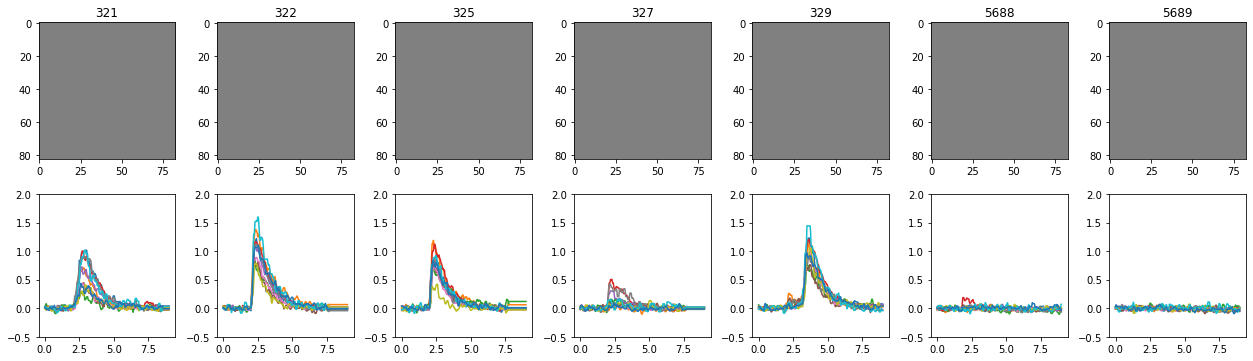

In [8]:
animate_vstim_ca(dataset=dataset,
                 vstim_list=vstim_list,
                 lc_type=sel_lc,
                 out_fname=str(out_fname),
                 fig_width=fig_width,
                 fig_height=fig_height)


## Example: receptive field mapping for one neuron

In [9]:
# user defined options
sel_lc = 'lc4'
sel_uid = 2019072716
out_fname_suffix = '_rf.mp4'

# generate the rf vstim filenames
rf_vstim_prefix = '48'
rf_vstim_suffix = '090'

vstim_list = []

n_rows = 7
n_cols = 9

for r in np.arange(n_rows):
    for c in np.arange(n_cols):
        vstim_name = rf_vstim_prefix + str(r).zfill(2) + str(c).zfill(2) + rf_vstim_suffix
        vstim_list.append( vstim_name )

In [10]:
effective_fps = mov_fps/dilute_factor
out_fname = output_dir / str(str(sel_uid) + out_fname_suffix)

fig_scale_factor = 2.5        
fig_width = fig_scale_factor*n_cols
fig_height = fig_scale_factor*n_rows*2

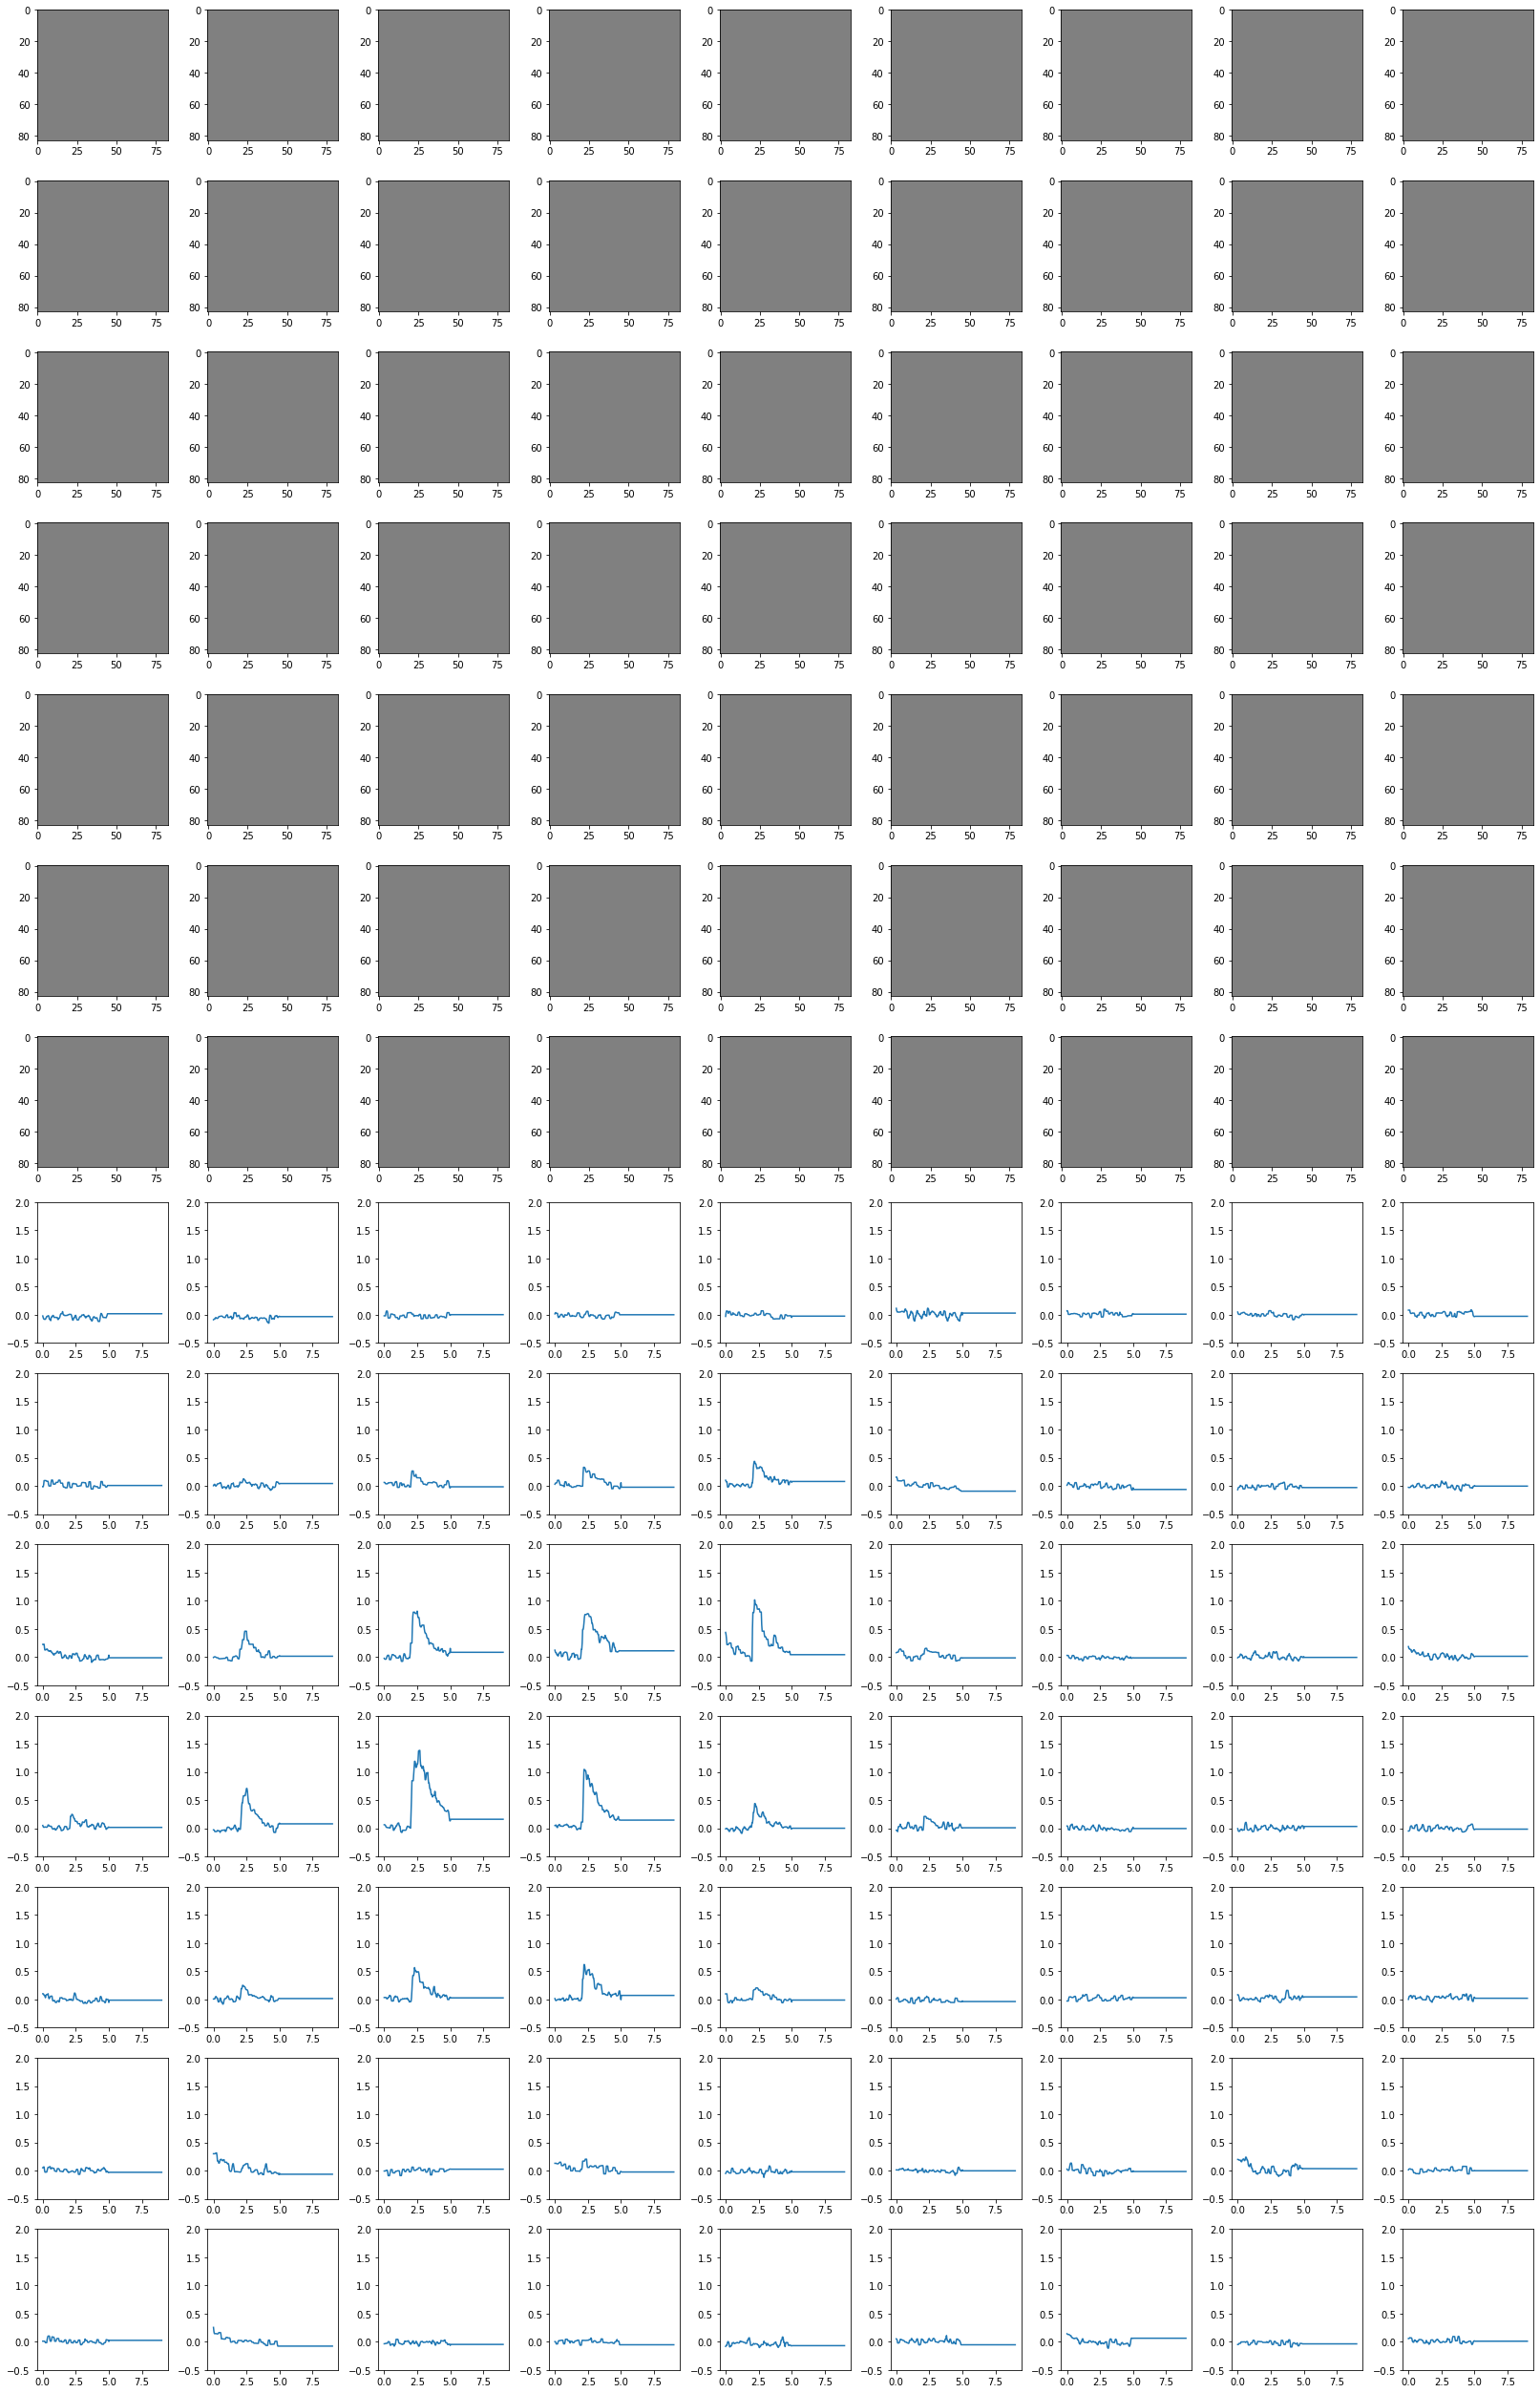

In [11]:
animate_grid_vstim_ca(dataset=dataset,
                      vstim_list=vstim_list,
                      lc_type=sel_lc,
                      uid=sel_uid,
                      out_fname=out_fname,
                      n_rows=n_rows,
                      n_cols=n_cols,
                      fig_width=fig_width,
                      fig_height=fig_height)